In [1]:
import os
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from graphviz import Source

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# the pwd assignment is needed for using it via docker.
# absolute path as interpreted by the container has to be specified
pwd: str = os.environ['HOME'] + '/work/assignment/assignment-5'

#### Analyze Iris data set

In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
predictors: DataFrame = pd.DataFrame(iris.data)
target: DataFrame = pd.DataFrame(iris.target)

In [9]:
predictors.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
target.columns = ['Flower_Type']

In [10]:
predictors

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#Check whether this dataframe has any nan value
predictors.isnull().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
dtype: bool

In [12]:
#Split data into training and testing set
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.2)

In [13]:
pred_train

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
109,7.2,3.6,6.1,2.5
90,5.5,2.6,4.4,1.2
132,6.4,2.8,5.6,2.2
141,6.9,3.1,5.1,2.3
20,5.4,3.4,1.7,0.2
...,...,...,...,...
13,4.3,3.0,1.1,0.1
16,5.4,3.9,1.3,0.4
119,6.0,2.2,5.0,1.5
42,4.4,3.2,1.3,0.2


In [14]:
tar_train

,Flower_Type
109,2
90,1
132,2
141,2
20,0
...,...
13,0
16,0
119,2
42,0


In [15]:
#Build Decision Tree model on training data
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [16]:
#Predicting
predictions = classifier.predict(pred_test)

In [17]:
confusion_matrix(tar_test, predictions)

array([[15,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  9]])

In [18]:
accuracy_score(tar_test, predictions)

0.9666666666666667

In [19]:
#Displaying the decision tree
tree.export_graphviz(classifier, out_file=pwd+'/tree.dot', feature_names=predictors.columns)
print('done..')

done..


In [21]:
predictors.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


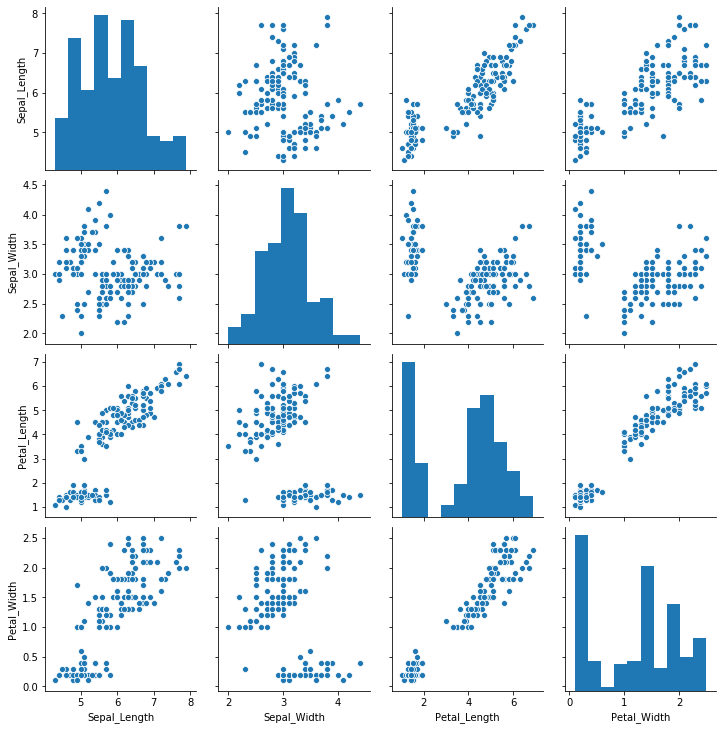

In [22]:
sns.pairplot(predictors)

In [23]:
irisDataFrame = pd.concat([predictors, target])

In [24]:
irisDataFrame.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
irisDataFrame = pd.concat([predictors, target], axis=1, ignore_index=True)

In [26]:
irisDataFrame.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


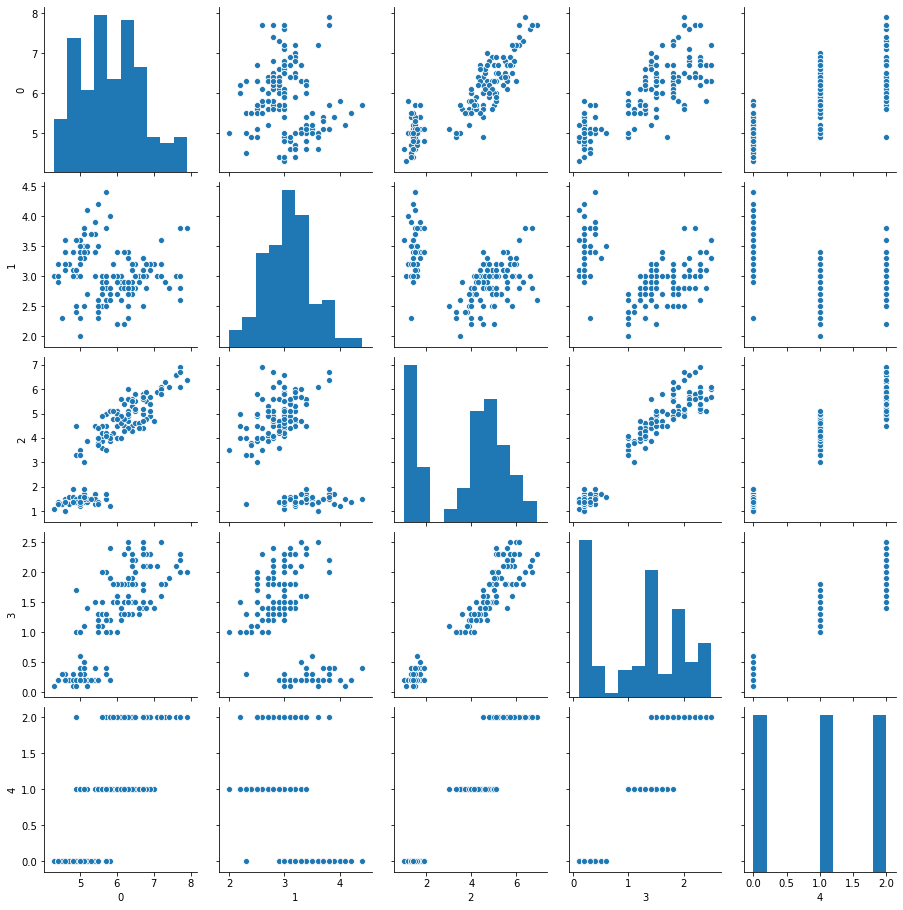

In [27]:
sns.pairplot(irisDataFrame)

In [28]:
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train, tar_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [29]:
#Predicting
predictions = classifier.predict(pred_test)

In [30]:
confusion_matrix(tar_test, predictions)

array([[15,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 10]])

In [31]:
accuracy_score(tar_test, predictions)

1.0

In [32]:
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(pred_train, tar_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
predictions = classifier.predict(pred_test)

In [34]:
confusion_matrix(tar_test,predictions)

array([[15,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 10]])

In [35]:
accuracy_score(tar_test, predictions)

1.0

In [36]:
classifier.feature_importances_

array([0.08806254, 0.02594307, 0.42565985, 0.46033454])

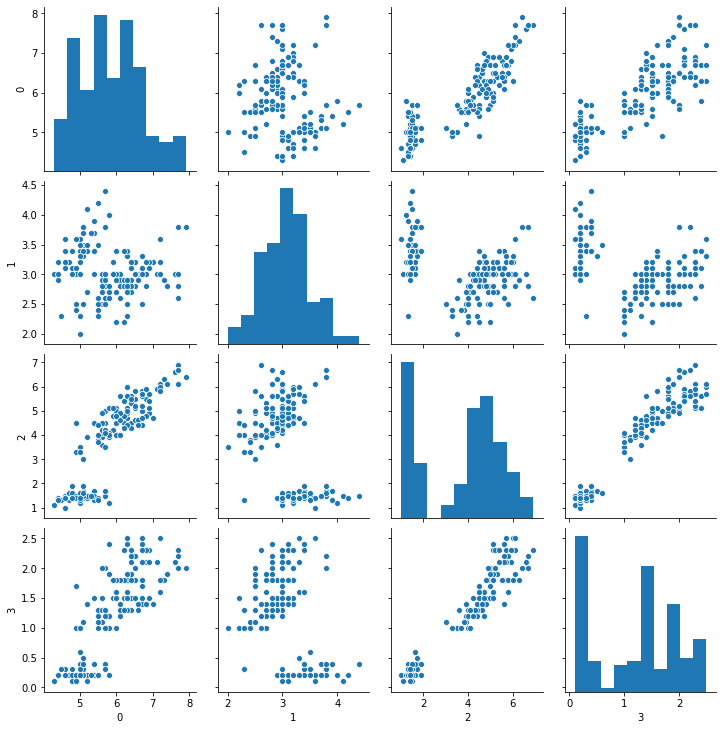

In [37]:
sns.pairplot(irisDataFrame.iloc[:, 0:4])

In [38]:
irisDataFrame.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

In [39]:
irisDataFrame.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
path: str = pwd + '/tree.dot'
s = Source.from_file(path)
s.view()


'/home/jovyan/work/assignment/assignment-5/tree.dot.pdf'